In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
#-----------------part 3
print("=====part3:Dataset Loading and preprocessing===")
      #3.1 load datasets (eg. MNIST, CIFAR-10)
      #load  mnist datasets 
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = tf.keras.datasets.mnist.load_data()
#normalise
mnist_train = mnist_train/255.0
mnist_test = mnist_test/255.0

#expand dimensu=ions (eg. MNIST images are grayscale)
mnist_train = mnist_train[..., tf.newaxis]
mnist_train = mnist_train[..., tf.newaxis]

print(f"MINST Train Shape: {mnist_train.shape}, MNIST Test Shape: {mnist_test.shape}")

#3.2 Create a custom dataset using tf.data Datasets
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((mnist_train, mnist_train_labels))
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((mnist_test, mnist_test_labels))
test_dataset = test_dataset.batch(batch_size)

#3.3 perform Data Augmentation using TensorFlow operations
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label
    augment_train_dataset = train_dataset.map(augment)

=====part3:Dataset Loading and preprocessing===
MINST Train Shape: (60000, 28, 28, 1, 1), MNIST Test Shape: (10000, 28, 28)



== Part 4:Build and Train a Simple Model==
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9110 - loss: 0.2835 - val_accuracy: 0.9868 - val_loss: 0.0387
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9856 - loss: 0.0456 - val_accuracy: 0.9869 - val_loss: 0.0402
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9903 - loss: 0.0299 - val_accuracy: 0.9895 - val_loss: 0.0307
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9927 - val_loss: 0.0240
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9913 - val_loss: 0.0283


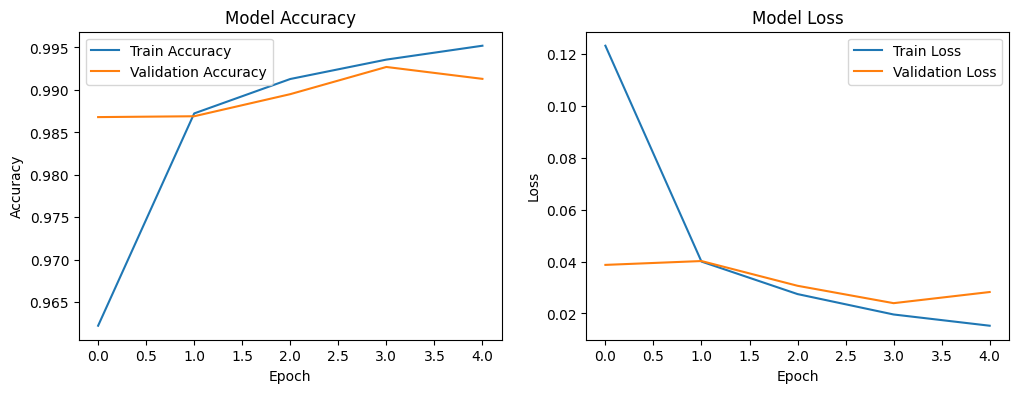

Gayatri Kulkarni -5300423002


In [19]:
#------------------------------------ Part 4:Build and train simple model---------------#
print("\n== Part 4:Build and Train a Simple Model==")
#4.1 Create a Neural Network to Classify MNIST using the Sequential API
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes for MNIST digits
])

#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4.2 Train the Model
history = model.fit(train_dataset, epochs=5, validation_data=test_dataset)

#4.3 Evaluate any Visualise Model Performance
plt.figure(figsize=(12, 4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
print("Gayatri Kulkarni -5300423002")